In [24]:
import numpy as np
import tensorflow as tf
import keras

In [25]:
from keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
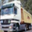

In [10]:
X_train[1]

In [12]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [13]:
y_train.shape

(50000, 1)

In [14]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [16]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

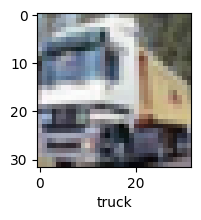

In [17]:
plot_sample(X_train, y_train, 1)

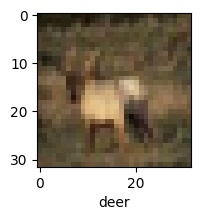

In [18]:
plot_sample(X_train, y_train, 3)

In [20]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [21]:
X_train = X_train/255
X_train[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

In [22]:
X_test = X_test/255
X_test[1]

array([[[0.92156863, 0.92156863, 0.92156863],
        [0.90588235, 0.90588235, 0.90588235],
        [0.90980392, 0.90980392, 0.90980392],
        ...,
        [0.91372549, 0.91372549, 0.91372549],
        [0.91372549, 0.91372549, 0.91372549],
        [0.90980392, 0.90980392, 0.90980392]],

       [[0.93333333, 0.93333333, 0.93333333],
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863],
        ...,
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.92156863, 0.92156863, 0.92156863]],

       [[0.92941176, 0.92941176, 0.92941176],
        [0.91764706, 0.91764706, 0.91764706],
        [0.91764706, 0.91764706, 0.91764706],
        ...,
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863],
        [0.91764706, 0.91764706, 0.91764706]],

       ...,

       [[0.34117647, 0.38823529, 0.34901961],
        [0.16862745, 0.2       , 0.14509804],
        [0.0745098 , 0

Let's first do artificial neural network

In [26]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 172s 110ms/step - accuracy: 0.3060 - loss: 1.9351
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 154s 98ms/step - accuracy: 0.4194 - loss: 1.6454
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 160s 102ms/step - accuracy: 0.4503 - loss: 1.5533
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 185s 118ms/step - accuracy: 0.4717 - loss: 1.4980
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 179s 114ms/step - accuracy: 0.4939 - loss: 1.4401


In [27]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.61      0.46      0.52      1000
           1       0.67      0.52      0.59      1000
           2       0.44      0.15      0.23      1000
           3       0.45      0.18      0.26      1000
           4       0.32      0.65      0.43      1000
           5       0.38      0.42      0.40      1000
           6       0.51      0.56      0.53      1000
           7       0.59      0.49      0.54      1000
           8       0.55      0.70      0.61      1000
           9       0.49      0.67      0.57      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



Time for CNN

In [28]:
cnn = models.Sequential([
    #CNN steps
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),

    #Another layer of convultion and pooling
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 61ms/step - accuracy: 0.3766 - loss: 1.7151
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 44ms/step - accuracy: 0.5835 - loss: 1.1792
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.6456 - loss: 1.0126
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.6868 - loss: 0.9082
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.7073 - loss: 0.8459
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.7271 - loss: 0.7838
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.7436 - loss: 0.7309
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7602 - loss: 0.6884
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7742 - loss: 0.6435
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.7905 - loss: 0.5992


In [30]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7038 - loss: 0.8889


[0.9062672853469849, 0.7023000121116638]

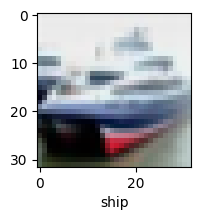

In [31]:
y_test = y_test.reshape(-1,)
plot_sample(X_test, y_test, 1)

In [32]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


array([[9.92313772e-03, 1.52446926e-04, 4.52784030e-03, 7.49747455e-01,
        3.11026146e-04, 8.94289687e-02, 3.57782375e-03, 5.87325121e-05,
        1.41968012e-01, 3.04516085e-04],
       [4.41108481e-04, 7.78160766e-02, 8.34988623e-06, 6.61691388e-07,
        4.92326990e-07, 5.20964605e-08, 6.05875750e-09, 1.17614775e-07,
        9.21450019e-01, 2.83163070e-04],
       [4.54450518e-01, 3.59327085e-02, 3.93049372e-03, 1.80064328e-03,
        7.60511914e-03, 5.82751178e-04, 3.43254251e-05, 1.05260573e-02,
        4.62976098e-01, 2.21614242e-02],
       [9.11149919e-01, 9.38871875e-03, 3.68779479e-03, 6.08938630e-04,
        4.65400657e-03, 5.03769079e-05, 2.91300850e-04, 7.13320333e-05,
        7.00237900e-02, 7.37302544e-05],
       [2.39772658e-06, 6.93703696e-05, 9.46939364e-03, 3.86161059e-02,
        6.35023654e-01, 7.70060404e-04, 3.15949738e-01, 3.54065577e-07,
        9.15838173e-05, 7.37351866e-06]], dtype=float32)

In [34]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(4)]

In [35]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

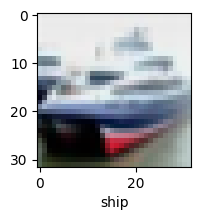

In [36]:
plot_sample(X_test, y_test, 1)

In [37]:
classes[y_classes[1]]

'ship'

In [38]:
print("Classification report: \n", classification_report(y_test, y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.78      0.77      1000
           1       0.85      0.76      0.80      1000
           2       0.57      0.64      0.61      1000
           3       0.51      0.52      0.52      1000
           4       0.62      0.69      0.65      1000
           5       0.65      0.54      0.59      1000
           6       0.82      0.73      0.77      1000
           7       0.76      0.73      0.75      1000
           8       0.77      0.83      0.80      1000
           9       0.75      0.80      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



Exercise

Use CNN instead of ANN to do handwritten digits classification using MNIST dataset.


In [40]:
(X_train,y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [41]:
X_train.shape

(60000, 28, 28)

In [42]:
X_test.shape

(10000, 28, 28)

In [43]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

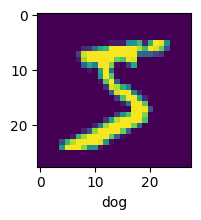

In [45]:
plot_sample(X_train, y_train, 0)

In [46]:
X_train = X_train /255
X_test = X_test /255

In [47]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [48]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

ANN First

In [51]:
ann = models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8696 - loss: 0.4632
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9630 - loss: 0.1265
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9747 - loss: 0.0849
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9804 - loss: 0.0653
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9852 - loss: 0.0499
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9885 - loss: 0.0393
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9901 - loss: 0.0327
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9924 - loss: 0.0249
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9934 - loss: 0.0216
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9949 - loss: 0.0171


In [52]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9765 - loss: 0.0885


[0.0739363506436348, 0.9797999858856201]

In [53]:
y_pred = ann.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[9.3674716e-03, 2.4645567e-06, 1.7766793e-01, 8.9936757e-01,
        3.5304149e-07, 5.5942461e-03, 1.0958524e-10, 9.9999803e-01,
        9.1155082e-02, 3.6671945e-01],
       [7.4496588e-06, 9.7967184e-01, 1.0000000e+00, 6.3185081e-02,
        8.9614479e-12, 1.8510135e-01, 2.6287667e-03, 6.5891986e-10,
        1.0773277e-01, 1.7472091e-11],
       [2.4289290e-04, 9.9941480e-01, 9.6738562e-03, 7.6784594e-03,
        3.0496180e-02, 4.3562537e-05, 1.9491160e-03, 2.5360620e-01,
        2.1577705e-01, 1.8647328e-03],
       [9.9999994e-01, 3.8834405e-04, 6.6806537e-01, 1.5136127e-04,
        1.2956548e-04, 5.0599001e-02, 3.8656551e-01, 3.7688609e-02,
        2.8701082e-08, 3.8488589e-02],
       [4.1578111e-04, 3.7344122e-08, 5.7288446e-03, 2.4383612e-06,
        9.9999881e-01, 6.5085424e-06, 2.2042226e-02, 6.6289246e-01,
        8.7788049e-04, 9.9613762e-01]], dtype=float32)

In [54]:
y_pred_max = [np.argmax(element) for element in y_pred]
y_pred_max[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [55]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [56]:
#Y_pred_max is our predictions, y_test is our actual, we got a 98 percent accuracy

print("Classification report: \n", classification_report(y_test, y_pred_max))

Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [58]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

cnn = models.Sequential([
    #CNN stuff
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'), # input_shape is inferred here
    keras.layers.MaxPooling2D((2,2)),


    #ANN stuff
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.9015 - loss: 0.3282
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9845 - loss: 0.0500
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9897 - loss: 0.0318
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9924 - loss: 0.0239
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9947 - loss: 0.0161
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9959 - loss: 0.0124
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9964 - loss: 0.0116
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - accuracy: 0.9967 - loss: 0.0095
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9977 - loss: 0.0069
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9971 - loss: 0.0074


In [59]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9880 - loss: 0.0386


[0.028557946905493736, 0.9915000200271606]

In [60]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


array([[4.6942256e-05, 6.9017834e-03, 2.4973778e-02, 3.0605656e-01,
        3.3411667e-02, 5.8001930e-05, 3.9691606e-09, 1.0000000e+00,
        2.8659872e-04, 2.5555184e-02],
       [9.0332854e-01, 4.0907621e-02, 1.0000000e+00, 5.7397266e-08,
        1.9932457e-03, 2.7189069e-13, 8.0730999e-01, 1.0580004e-08,
        1.5068954e-03, 7.6795392e-10],
       [5.9376244e-04, 9.9999982e-01, 6.5150562e-05, 1.6789221e-08,
        8.8171899e-01, 9.8715043e-03, 1.0473990e-03, 3.7615523e-01,
        2.9812388e-02, 8.1829211e-07],
       [1.0000000e+00, 7.5806000e-08, 5.5396283e-04, 4.3764230e-06,
        3.8445499e-04, 2.3101344e-04, 7.2195772e-03, 6.2948745e-01,
        7.4734962e-05, 9.6649766e-01],
       [5.1211719e-03, 2.7490330e-05, 3.0061412e-05, 2.3739210e-07,
        1.0000000e+00, 3.4933813e-02, 1.0399870e-02, 3.2544855e-03,
        5.1008556e-03, 9.6553242e-01]], dtype=float32)

In [61]:
y_pred_max = [np.argmax(element) for element in y_pred]
y_pred_max[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [62]:
print("Classification report: \n", classification_report(y_test, y_pred_max))

Classification report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



CNN was better